In [ ]:
!pip install tensorflow

In [1]:
!apt-get install -qq git

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download paramaggarwal/fashion-product-images-small

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small
License(s): copyright-authors
fashion-product-images-small.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip fashion-product-images-small

Archive:  fashion-product-images-small.zip
replace images/10000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: images/10000.jpg        
replace images/10001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: -Y
error:  invalid response [-Y]
replace images/10001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/10002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/10003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/10005.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D, Input
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

# Define input layer with shape
input_tensor = Input(shape=(224, 224, 3))

# Load the pre-trained ResNet50 model without the top classification layers
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
base_model.trainable = False

# Add a global max pooling layer
x = base_model.output
x = GlobalMaxPool2D()(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Now try to print the summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
img=image.load_img('/content/myntradataset/images/10004.jpg',target_size=(224,224))

In [ ]:
img_array=image.img_to_array(img)
img_array.shape

(224, 224, 3)

In [ ]:
import numpy as np
expanded_img=np.expand_dims(img_array,axis=0)
print(expanded_img.shape)

(1, 224, 224, 3)


In [ ]:
preprocessed_img=preprocess_input(expanded_img)

In [ ]:
res=model.predict(preprocessed_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
res=res.flatten()

In [ ]:
from numpy.linalg import norm
l2_norm=norm(res)
l2_norm

242.8423

In [ ]:
res=res/l2_norm
res

array([0.00306836, 0.06240454, 0.        , ..., 0.00170628, 0.02032895,
       0.05833264], dtype=float32)

In [ ]:
def extract_features(img_path,model):
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  expanded_img=np.expand_dims(img_array,axis=0)
  preprocessed_img=preprocess_input(expanded_img)
  result=model.predict(preprocessed_img).flatten()
  normalized_result=result/norm(result)
  return normalized_result

In [ ]:
import os

In [ ]:
os.listdir('/content/myntradataset/images')

['26179.jpg',
 '17149.jpg',
 '31861.jpg',
 '44875.jpg',
 '32567.jpg',
 '36304.jpg',
 '5490.jpg',
 '7172.jpg',
 '4123.jpg',
 '57448.jpg',
 '42806.jpg',
 '18363.jpg',
 '43592.jpg',
 '14534.jpg',
 '15085.jpg',
 '32183.jpg',
 '53849.jpg',
 '19271.jpg',
 '19941.jpg',
 '30073.jpg',
 '54977.jpg',
 '31985.jpg',
 '57244.jpg',
 '25479.jpg',
 '40108.jpg',
 '44811.jpg',
 '20866.jpg',
 '57803.jpg',
 '48180.jpg',
 '35554.jpg',
 '50352.jpg',
 '3178.jpg',
 '59910.jpg',
 '57241.jpg',
 '16280.jpg',
 '39170.jpg',
 '50900.jpg',
 '51889.jpg',
 '56375.jpg',
 '35191.jpg',
 '22248.jpg',
 '55871.jpg',
 '55224.jpg',
 '14749.jpg',
 '18656.jpg',
 '29692.jpg',
 '43101.jpg',
 '24331.jpg',
 '29410.jpg',
 '3108.jpg',
 '55863.jpg',
 '16345.jpg',
 '37306.jpg',
 '1583.jpg',
 '26805.jpg',
 '6465.jpg',
 '39857.jpg',
 '58896.jpg',
 '36621.jpg',
 '25011.jpg',
 '41770.jpg',
 '37880.jpg',
 '44709.jpg',
 '26350.jpg',
 '9703.jpg',
 '32210.jpg',
 '32463.jpg',
 '46482.jpg',
 '32541.jpg',
 '9767.jpg',
 '25762.jpg',
 '7362.jpg',
 '

In [ ]:
filenames=[]

for file in os.listdir('/content/myntradataset/images'):
  filenames.append(os.path.join('/content/myntradataset/images',file))
print(len(filenames))

44441


In [ ]:
filenames[3]

'/content/myntradataset/images/44875.jpg'

In [ ]:
feature_list=[]
for file in filenames[:100]:
  feature_list.append(extract_features(file,model))
feature_list=np.array(feature_list)
print(feature_list.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from google.colab.patches import cv2_imshow

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[[24 36 54 45 61 20]]


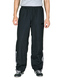

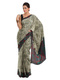

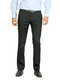

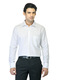

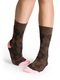

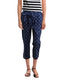

In [ ]:
sample_img_features=extract_features('/content/myntradataset/images/10004.jpg',model)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=6,algorithm='brute',metric='cosine')
neighbors.fit(feature_list)
distances,indices=neighbors.kneighbors([sample_img_features])
print(indices)
near=[]
for file in indices[0]:
  near.append(filenames[file])
import cv2
for i in near:
  temp=cv2.imread(i)
  cv2_imshow(temp)
  cv2.waitKey(0)